<a href="https://colab.research.google.com/github/rylan-berry/DataScienceExercises2025-2026/blob/main/Rylan's_Copy_of_Unit3ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install preliz

In [29]:
import preliz as pz

# Unit 3 Exercises: Delightfully Diverse Distirbutions

Use these exercises as a chance to explore the probability distributions (dists) from the pymc and preliz libraries. [Moments](https://en.wikipedia.org/wiki/Moment_(mathematics)), the main subject of these exercises, are a great way to describe dists, but there's another  way: [maximum entropy](https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution#Other_examples), which, although important, we will not cover in detail.

Here's what we'll cover in this Unit's exercises:
- The first four moments: mean, variance, skew, and kurtosis, as well as the support.
- Single variable continuous distributions.
- Single variable discrete distriutions


Why do we need to know this stuff? Two reasons:
- Probability distributions are required to set priors and likelihoods in pymc.
- Randomness and uncertainty are not well defined mathematically, but probability and probability distributions are.

With that in mind, think of these exercises as an oppurtunity to explore the ways we can be uncertain, or the ways things can be random.

## The First Four Moments: Mean, Variance, Skew, and Kurtosis

When we talk about a probablity dist, we often care about at four things:
- The expected value, or where a distribution is centered (mean)
- The amount of variation from that centered value (variation)
- Whether or not our distribution favors, leans towards, or skews towards certain values. (skew)
- How often to expect unusually high or low values. (kurtosis)

### Playing with Beta

**Task1**:

Plot a [preliZ Beta distribution](https://preliz.readthedocs.io/en/latest/api_reference.html#preliz.distributions.beta.Beta) with $α=1$ and $β=1$.

<Axes: >

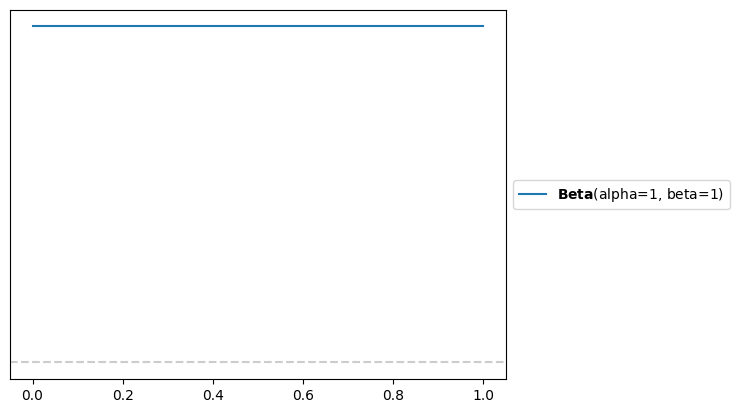

In [30]:
b = pz.Beta(alpha = 1, beta = 1)
b.plot_pdf()

**Task2**:

Find the mean, variance, skew, and kurtosis of a $Beta(1,1)$ distribution. This is the same as asking for the first four moments of a $Beta(1,1)$ distribution.

*Hint*: preliZ has built in function that does this for you.

In [31]:
b.mean(), b.var(), b.skewness(), b.kurtosis()

(np.float64(0.5), np.float64(0.08333333333333333), array(0.), np.float64(-1.2))

**Task3**:

Plot the following distributions on seperate graphs: $Beta(1,1)$, $Beta(0.9,0.9)$, $Beta(2,1)$, $Beta(1,2)$, $Beta(7,11)$, $Beta(96,42)$, $Beta(5,5)$, $Beta(500,500)$, $Beta(0.8,0.9)$.

Then, determine which of those distribtuions has:
- the largest/smallest mean
- the largest/smallest variance
- the largest/smallest skew
- the largest/smallest kurtosis

and show the code you used to find that information.

In [32]:
alphas_betas = [(1,1),(0.9,0.9),(2,1),(1,2),(7,11),(96,42),(5,5),(500,500),(0.8,0.9)]
dists = []
for a, b in alphas_betas:
  dists.append(pz.Beta(alpha = a, beta = b))

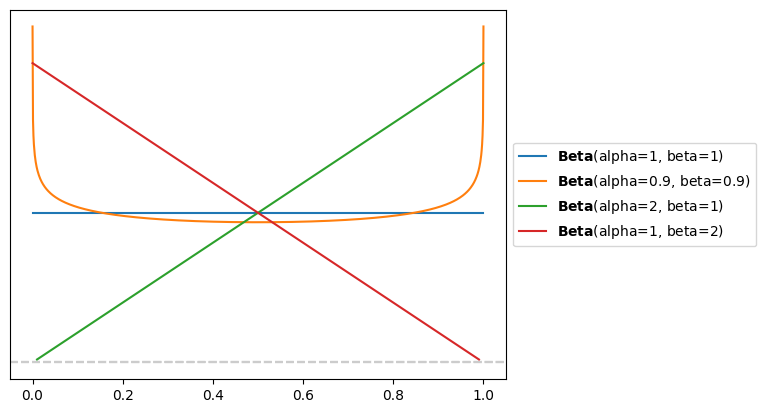

In [33]:
for dist in dists[:int(len(dists)/2)]:
  dist.plot_pdf()

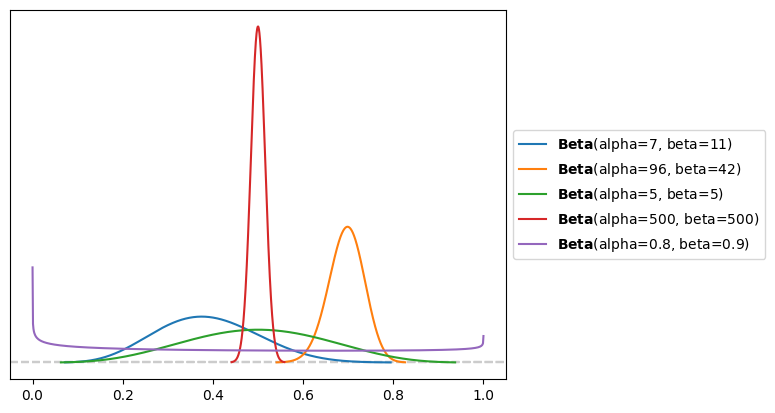

In [34]:
for dist in dists[int(len(dists)/2):]:
  dist.plot_pdf()

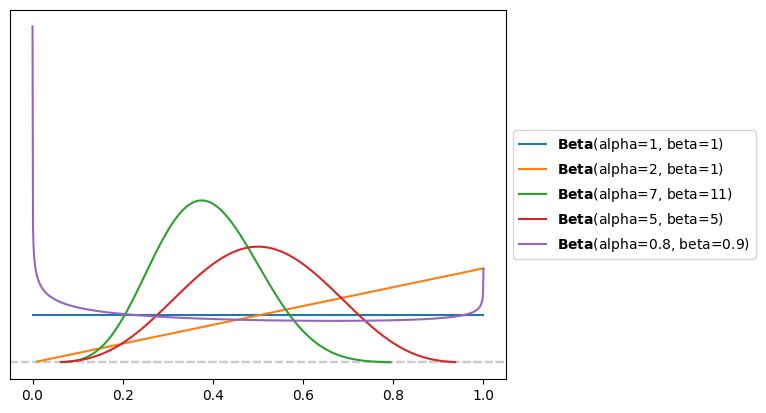

In [35]:
for dist in dists[::2]:
  dist.plot_pdf()

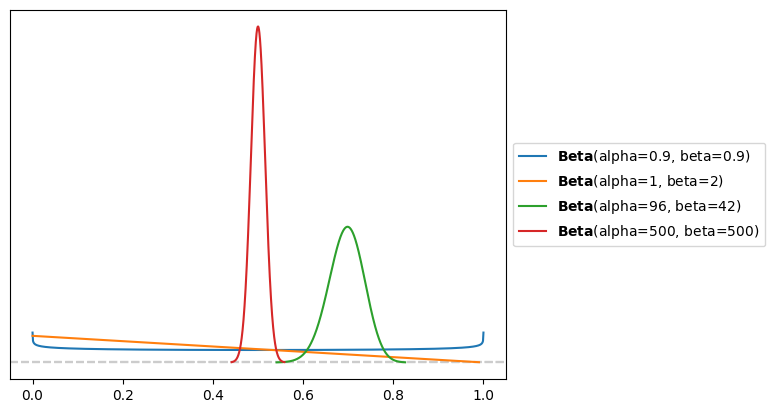

In [36]:
for dist in dists[1::2]:
  dist.plot_pdf()

In [37]:
print("Dist\t\t\t\t  Mean\t\tVari\tSkew\tKurtosis")
for dist in dists:
  print(f"{dist}   \t: {dist.mean():.3f},\t{dist.var():.3f},\t{dist.skewness():.3f},\t{dist.kurtosis():.3f}")

Dist				  Mean		Vari	Skew	Kurtosis
Beta(alpha=1, beta=1)   	: 0.500,	0.083,	0.000,	-1.200
Beta(alpha=0.9, beta=0.9)   	: 0.500,	0.089,	0.000,	-1.250
Beta(alpha=2, beta=1)   	: 0.667,	0.056,	-0.566,	-0.600
Beta(alpha=1, beta=2)   	: 0.333,	0.056,	0.566,	-0.600
Beta(alpha=7, beta=11)   	: 0.389,	0.013,	0.199,	-0.229
Beta(alpha=96, beta=42)   	: 0.696,	0.002,	-0.143,	-0.012
Beta(alpha=5, beta=5)   	: 0.500,	0.023,	0.000,	-0.462
Beta(alpha=500, beta=500)   	: 0.500,	0.000,	0.000,	-0.006
Beta(alpha=0.8, beta=0.9)   	: 0.471,	0.092,	0.105,	-1.264


In [38]:
def sortByFunc(arr, func):
  for i in range(len(arr)):
    for j in range(i+1, len(arr)):
      if func(arr[i]) < func(arr[j]):
        temp = arr[i]
        arr[i] = arr[j]
        arr[j] = temp
  return arr

In [39]:
meanSort = sortByFunc(dists, lambda a: a.mean())
meanSort

[Beta(alpha=96, beta=42),
 Beta(alpha=2, beta=1),
 Beta(alpha=1, beta=1),
 Beta(alpha=0.9, beta=0.9),
 Beta(alpha=5, beta=5),
 Beta(alpha=500, beta=500),
 Beta(alpha=0.8, beta=0.9),
 Beta(alpha=7, beta=11),
 Beta(alpha=1, beta=2)]

In [40]:
for dist in meanSort:
  print(dist,"  \t",dist.mean())

Beta(alpha=96, beta=42)   	 0.6956521739130435
Beta(alpha=2, beta=1)   	 0.6666666666666666
Beta(alpha=1, beta=1)   	 0.5
Beta(alpha=0.9, beta=0.9)   	 0.5
Beta(alpha=5, beta=5)   	 0.5
Beta(alpha=500, beta=500)   	 0.5
Beta(alpha=0.8, beta=0.9)   	 0.47058823529411764
Beta(alpha=7, beta=11)   	 0.3888888888888889
Beta(alpha=1, beta=2)   	 0.3333333333333333


In [41]:
varSort = sortByFunc(dists, lambda a: a.var())
varSort

[Beta(alpha=0.8, beta=0.9),
 Beta(alpha=0.9, beta=0.9),
 Beta(alpha=1, beta=1),
 Beta(alpha=2, beta=1),
 Beta(alpha=1, beta=2),
 Beta(alpha=5, beta=5),
 Beta(alpha=7, beta=11),
 Beta(alpha=96, beta=42),
 Beta(alpha=500, beta=500)]

In [42]:
skewSort = sortByFunc(dists, lambda a: a.skewness())
skewSort

[Beta(alpha=1, beta=2),
 Beta(alpha=7, beta=11),
 Beta(alpha=0.8, beta=0.9),
 Beta(alpha=0.9, beta=0.9),
 Beta(alpha=5, beta=5),
 Beta(alpha=1, beta=1),
 Beta(alpha=500, beta=500),
 Beta(alpha=96, beta=42),
 Beta(alpha=2, beta=1)]

In [43]:
kurtSort = sortByFunc(dists, lambda a: a.kurtosis())
kurtSort

[Beta(alpha=500, beta=500),
 Beta(alpha=96, beta=42),
 Beta(alpha=7, beta=11),
 Beta(alpha=5, beta=5),
 Beta(alpha=1, beta=2),
 Beta(alpha=2, beta=1),
 Beta(alpha=1, beta=1),
 Beta(alpha=0.9, beta=0.9),
 Beta(alpha=0.8, beta=0.9)]

*Higher mean means the distribution is more towards 1, such distributions would be Beta(alpha=96, beta=42) and Beta(alpha=2, beta=1), since they are havier towards 1.0. A lower mean would be Beta(alpha=1, beta=2), the flip of Beta(alpha=2, beta=1).*

*Variance is how distant the distribution is, so Beta(alpha=500, beta=500) would be the lowest since it's all clustered up, whereas Beta(alpha=0.8, beta=0.9) and Beta(alpha=0.9, beta=0.9) would have the highest variances since the distribution is peaking towards the two extremes.*

*Skew determines how balanced at towards the center the the distribution is, something to the right of the center would be a negative skew, and something towards the left would have a positive skew, so Beta(alpha=2, beta=1) would have a large negative skew, and Beta(alpha=1, beta=2) would have a large positive skew.*

*Kurtosis says how close everything is to being the same number, So Beta(alpha=500, beta=500) is the highest, where as Beta(alpha=0.8, beta=0.9) and Beta(alpha=0.9, beta=0.9) would be the lowest. Note: All the numbers are negative, the closer to zero means closer to being the same number.*

###Playing with other Continuous Distributions

For the remaining tasks, make sure to continue to use the [preliZ documentation](https://preliz.readthedocs.io/en/latest/api_reference.html).

The [wikipedia pages for each of the probability distributions](https://en.wikipedia.org/wiki/List_of_probability_distributions) are also great resources.

[Wolfram Alpha](https://www.wolframalpha.com/examples/mathematics/probability/probability-distributions) is another great resource as well.

**Task4**:

Plot the pdfs of each of the following distributions on the same graph: $Normal(μ=0,σ=1)$, $StudentT(ν=1,μ=0,σ=1)$

Then, plot these on the same graph: $Exponential(λ=1/2)$, $Gamma(α=2,β=1)$, $HalfStudentT(ν=2,σ1)$

For the t distribution and half t, use

```
support=(-4,4)
```
and
```
support=(0,-4) *#should be 4*
```
respectively, inside the plot_pdf function.


<Axes: >

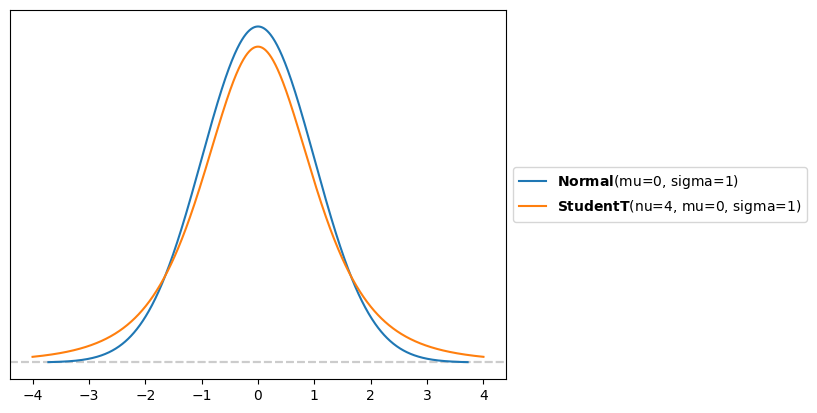

In [44]:
pz.Normal(mu = 0, sigma = 1).plot_pdf()
pz.StudentT(nu = 4, mu = 0, sigma = 1).plot_pdf(support=(-4,4))

(<Axes: >, <Axes: >, <Axes: >)

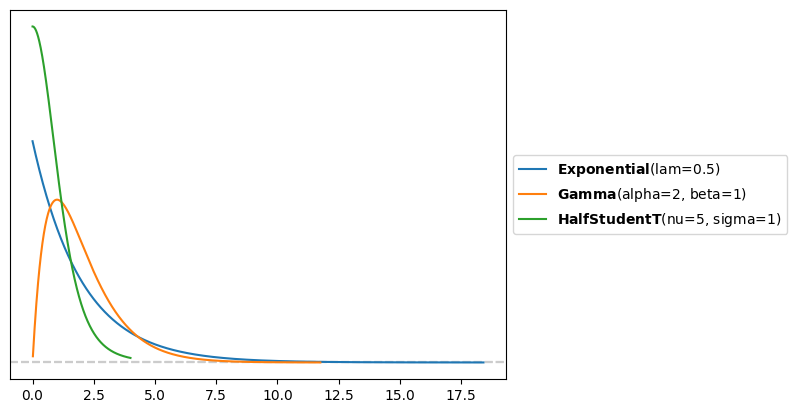

In [45]:
pz.Exponential(lam = 1/2).plot_pdf(), pz.Gamma(alpha = 2, beta = 1).plot_pdf(), pz.HalfStudentT(nu = 5, sigma = 1).plot_pdf(support=(0,4))

**Task5:**

Find the first four moments of the the distributions from Task4. Then,

Determine which of those five dsitributions has the largest and smallest: mean, variance, skew, and kurtosis.

Those distributions are repeated here for conveniencce: $Normal(μ=0,σ=1)$, $StudentT(ν=1,μ=0,σ=1)$,  $Exponential(λ=1/2)$, $Gamma(α=2,β=1)$, $HalfStudentT(ν=2,σ1)$

*I could code this but im going to make a guess based on the graphs.*

*The Norm, Stu.T and HalfStu.T all have the lowest mean and the Gamma function probably has the higher mean.*

*The HalfStu.T seems the have the lowest and highest variance and kurtosis respectivly. While the smallest kurtosis and highest variance is likely the Gamma.*

*The Gamma fuction likely has a negative skew, making it the least. The highest could be HalfStu.T but it looks like it would be very close to zero, which would make it equal to the Norm and Stu.T if that's the case.*



*I was using the wrong HalfStu.T this whole time, the instructions said to view it from (0, -4) which I'm pretty sure was a typo!*

In [46]:
#Now to check with code
dists2 = [pz.Normal(mu = 0, sigma = 1), pz.StudentT(nu = 4, mu = 0, sigma = 1), pz.Exponential(lam = 1/2), pz.Gamma(alpha = 2, beta = 1), pz.HalfStudentT(nu = 5, sigma = 1)]

In [47]:
for dist in dists2:
  print(dist, dist.moments())

Normal(mu=0, sigma=1) [np.float64(0.0), np.float64(1.0), 0, 0]
StudentT(nu=4, mu=0, sigma=1) [np.float64(0.0), np.float64(2.0), 0, inf]
Exponential(lam=0.5) [np.float64(2.0), np.float64(4.0), 2, 6]
Gamma(alpha=2, beta=1) [np.float64(2.0), np.float64(2.0), np.float64(1.414213562373095), np.float64(3.0)]
HalfStudentT(nu=5, sigma=1) [np.float64(0.9490167245562356), np.float64(0.7660339231792207), NotImplemented, NotImplemented]


In [48]:
sortByFunc(dists2, lambda a: a.mean())

[Exponential(lam=0.5),
 Gamma(alpha=2, beta=1),
 HalfStudentT(nu=5, sigma=1),
 StudentT(nu=4, mu=0, sigma=1),
 Normal(mu=0, sigma=1)]

In [49]:
sortByFunc(dists2, lambda a: a.var())

[Exponential(lam=0.5),
 Gamma(alpha=2, beta=1),
 StudentT(nu=4, mu=0, sigma=1),
 Normal(mu=0, sigma=1),
 HalfStudentT(nu=5, sigma=1)]

In [50]:
sortByFunc(dists2[:4], lambda a: a.skewness())

[Exponential(lam=0.5),
 Gamma(alpha=2, beta=1),
 StudentT(nu=4, mu=0, sigma=1),
 Normal(mu=0, sigma=1)]

In [51]:
sortByFunc(dists2[:4], lambda a: a.kurtosis())

[StudentT(nu=4, mu=0, sigma=1),
 Exponential(lam=0.5),
 Gamma(alpha=2, beta=1),
 Normal(mu=0, sigma=1)]

**Task6**:

What x values do the Exponenital, Gamma, HalfSutdentT, and HalfNormal functions support? Why plot them on the same graph?

*They cover only positive numbers. They should be plotted on the same graph so they aren't compared to dists that also exist in the negatives.*

What x values do the Normal and T distribution support? Why plot them on the same graph?

*They support both positive and negative values, they should be plotted on the same graph  for the same reason the other three are plotted on the same graph, to not mingle with distributions that use different domains.*

What x values does the Beta distribution support?

*The beta dist only supports x values from 0 to 1.*

**Task7**:

Can a distribution with support $[0,∞]$ have negative (or left) skew? If so, plot that specific distribution.

<Axes: >

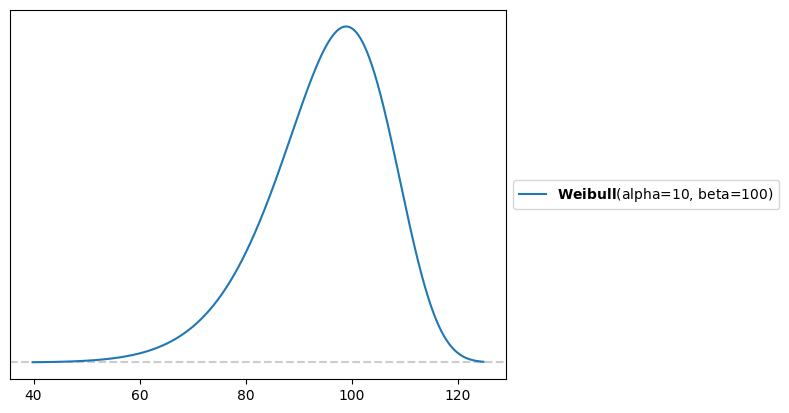

In [52]:
#Credit to T.A. Yale for aiding in locating this solution
pz.Weibull(alpha=10, beta=100).plot_pdf()

In [53]:
pz.Weibull(alpha=10, beta=100).skewness()

np.float64(-0.6376371339019897)

**Task8**:

Name a distribution that supports the real numbers with variance equal to 1, 0 skew, and 0 kurtosis.

<Axes: >

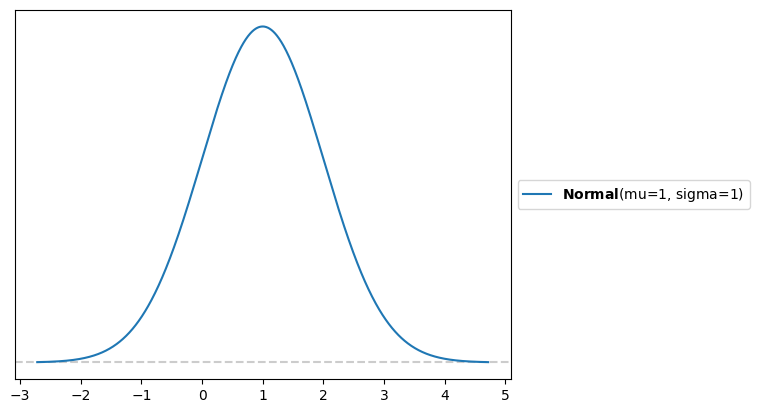

In [54]:
pz.Normal(mu=1, sigma=1).plot_pdf()

In [55]:
pz.Normal(mu=1, sigma=1).moments() #mvsk

[np.float64(1.0), np.float64(1.0), 0, 0]

**Task9**:

Name a distribution with support $(-∞,∞)$ and that has negative skew.

*Skew Normal and Skew StudentT (Totally didn't ask Matt who totally didn't have Yale whispering in his ear).*

**Optional Task**:

What are the maximum entropy conditions for the normal and gamma distributions?

###Playing with Discrete Distributions

**Task9**:

Plot the pdfs (techincally the pmfs) of the following distributions: $Bernoulli(p=0.7)$, $Binomial(n=10,p=0.7)$, $Poisson(μ=7)$, $Geometric(p=0.7)$, $HyperGeometric(N=50,k=35,n=15)$, $Categorical(p=[0.05,0.3,0.05,0.1,0.2,0.4])$

Additionally, compute the first four moments for all those distributions--except the Categorical distribution.

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


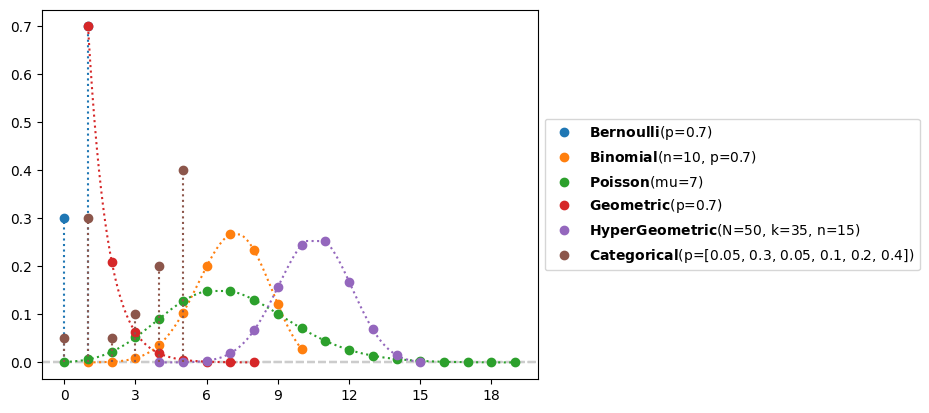

In [56]:
dists = [pz.Bernoulli(p = 0.7), pz.Binomial(n=10, p=0.7), pz.Poisson(mu=7), pz.Geometric(p=0.7), pz.HyperGeometric(N=50,k=35,n=15), pz.Categorical(p=[0.05,0.3,0.05,0.1,0.2,0.4])]
for dist in dists:
  print(dist.plot_pdf())

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


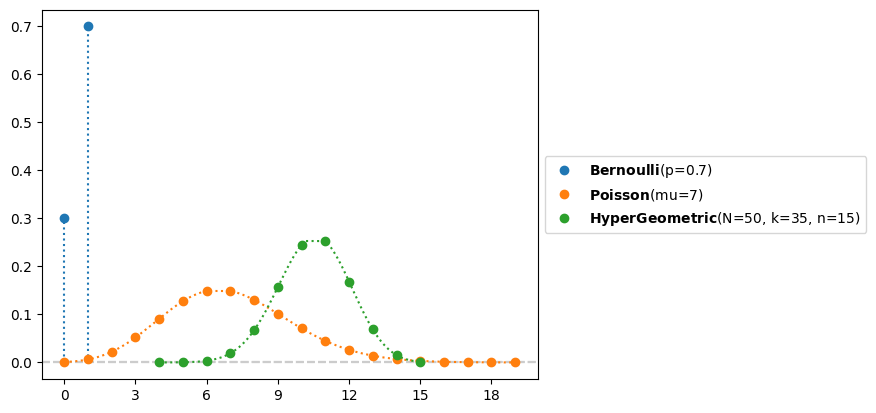

In [57]:
for dist in dists[::2]:
  print(dist.plot_pdf())

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


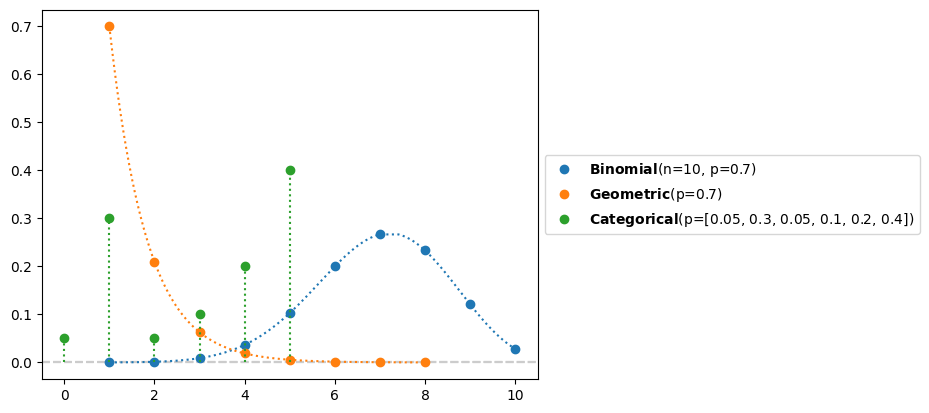

In [58]:
for dist in dists[1::2]:
  print(dist.plot_pdf())

In [59]:
for dist in dists:
  print(dist, ": \t", dist.moments())

Bernoulli(p=0.7) : 	 [np.float64(0.7), np.float64(0.21000000000000002), np.float64(-0.8728715609439692), np.float64(-1.238095238095238)]
Binomial(n=10, p=0.7) : 	 [np.float64(7.0), np.float64(2.1000000000000005), np.float64(-0.27602622373694163), np.float64(-0.12380952380952379)]
Poisson(mu=7) : 	 [np.float64(7.0), np.float64(7.0), np.float64(0.3779644730092272), np.float64(0.14285714285714285)]
Geometric(p=0.7) : 	 [np.float64(1.4285714285714286), np.float64(0.6122448979591838), np.float64(2.3734644158557194), np.float64(7.633333333333333)]
HyperGeometric(N=50, k=35, n=15) : 	 [np.float64(10.5), np.float64(2.25), np.float64(-0.1111111111111111), np.float64(-0.08983451536643026)]
Categorical(p=[0.05, 0.3, 0.05, 0.1, 0.2, 0.4]) : 	 [NotImplemented, NotImplemented, NotImplemented, NotImplemented]


**Task10**:

Describe what processes "generate" each of the previous discrete distributions models. Also report their support.

Here's a spicier way to phrase the question: describe these distributions' maximum entropy conditions in english.

Hint: Make sure to read any of the: preliZ documentation, relevant wikipedia articles, or wolfram alpha.


*Bernolli sets the inputed p to be at one, and 1-p at 0. Binomial goes up to the n value(things collected), the mean is np, and the variance is np(1-p). Poisson goes from 0 to inf, the mean is at mu, and the variance is mu. Geomertic goes from 0 to inf, the mean is 1/p, the variance is (1-p)/p^2. Hyper geometric functions exists where the support starts from either 0 or n-N+k (whichever is bigger) to k or n (whichever is smaller), the mean is nk/N, and the variance is (N - n)nk(N - k)/(N - 1)/N^2 (N is total pop, k is num of sucessful individuals, n is num of samples taken). And lastly, Categorical, the support is each int going up to the size of p - 1, where p is an array of nums, each num being the probability at it's given index.*